# DOMAIN: Healthcare

# CONTEXT: 
Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results. 

# DATA DESCRIPTION: 
The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.
1. P_incidence
2. P_tilt
3. L_angle 
4. S_slope
5. P_radius 
6. S_degree
7. Class

# PROJECT OBJECTIVE: 
Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms.

Steps and tasks:
## 1. Import and warehouse data:
• Import all the given datasets and explore shape and size of each.

• Merge all datasets onto one and explore final shape and size.
## 2. Data cleansing:
• Explore and if required correct the datatypes of each attribute

• Explore for null values in the attributes and if required drop or impute values.
## 3. Data analysis & visualisation:
• Perform detailed statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. 
## 4. Data pre-processing:
• Segregate predictors vs target attributes

• Perform normalisation or scaling if required.

• Check for target balancing. Add your comments.

• Perform train-test split.
## 5. Model training, testing and tuning:
• Design and train a KNN classifier.

• Display the classification accuracies for train and test data.

• Display and explain the classification report in detail.

• Automate the task of finding best values of K for KNN.

• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model. 
## 6. Conclusion and improvisation:
• Write your conclusion on the results.

• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the research team to perform a better data analysis in future.

# Solution:

Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Import and warehouse data:

1. a. Import all the given datasets and explore shape and size of each.

In [2]:
df1=pd.read_csv("Part1 - Normal.csv")
df2=pd.read_csv("Part1 - Type_H.csv")
df3=pd.read_csv("Part1 - Type_S.csv")

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


1. b. Merge all datasets onto one and explore final shape and size.

In [6]:
df=pd.concat([df1,df2,df3],ignore_index=True)
df

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


### 2. Data cleansing:

2. a. Explore and if required correct the datatypes of each attribute

In [8]:
import re
def conv_class(txt):
    x = re.findall("[l,L]$", txt)
    y = re.findall("[H,h]$",txt)
    z = re.findall("[S,s]$",txt)
    if x:
        return str("Normal")
    elif y:
        return str("Type_H")
    elif z:
        return str("Type_S")
    else:
        return str("aiden pearce")
    
df.Class=df.Class.apply(conv_class)

Here, we have converted the class column using regex.

2. b. Explore for null values in the attributes and if required drop or impute values.

In [9]:
df.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

There are no null values in the dataset.

### 3. Data analysis & visualisation:

3. a. Perform detailed statistical analysis on the data.

In [10]:
df.describe(include='all')

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,Type_S
freq,NaN,NaN,NaN,NaN,NaN,NaN,150
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


Here, the describe function gives us various statistcal insights in out data.

3. b.  Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. 

Univariate analysis

C:\Users\ac253\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='P_incidence', ylabel='Density'>

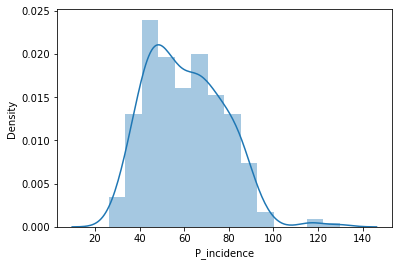

In [11]:
sns.distplot(df.P_incidence)

C:\Users\ac253\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='P_tilt', ylabel='Density'>

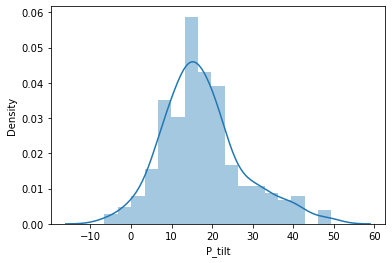

In [12]:
sns.distplot(df.P_tilt)

C:\Users\ac253\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='L_angle', ylabel='Density'>

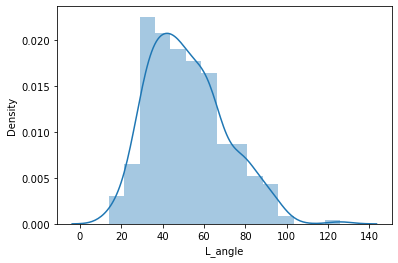

In [13]:
sns.distplot(df.L_angle)

C:\Users\ac253\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='S_slope', ylabel='Density'>

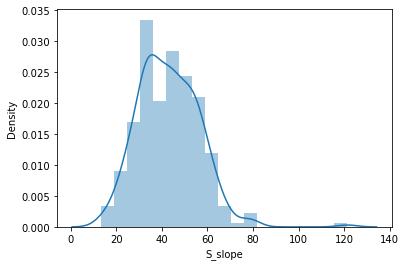

In [14]:
sns.distplot(df.S_slope)

C:\Users\ac253\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='P_radius', ylabel='Density'>

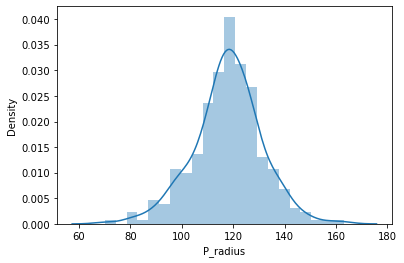

In [15]:
sns.distplot(df.P_radius)

C:\Users\ac253\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='S_Degree', ylabel='Density'>

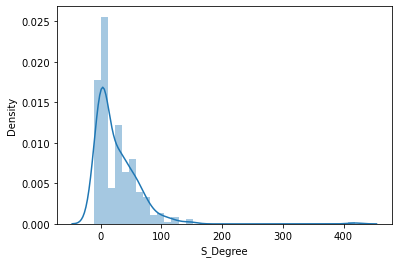

In [16]:
sns.distplot(df.S_Degree)

<AxesSubplot:xlabel='Class', ylabel='count'>

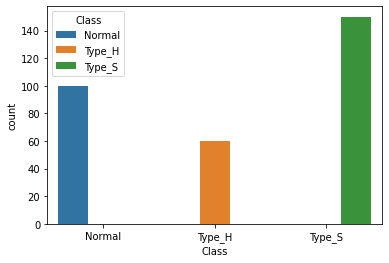

In [17]:
sns.countplot(x= df.Class, hue = df.Class)

Bivariate analysis

<AxesSubplot:xlabel='P_incidence', ylabel='P_tilt'>

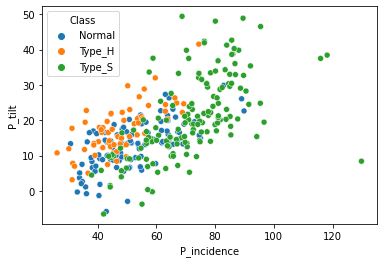

In [18]:
sns.scatterplot(x=df.P_incidence, y = df.P_tilt , hue = df.Class)           

<AxesSubplot:xlabel='P_incidence', ylabel='L_angle'>

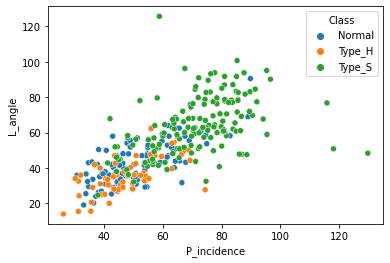

In [19]:
sns.scatterplot(x=df.P_incidence, y = df.L_angle , hue = df.Class)

<AxesSubplot:xlabel='P_incidence', ylabel='S_slope'>

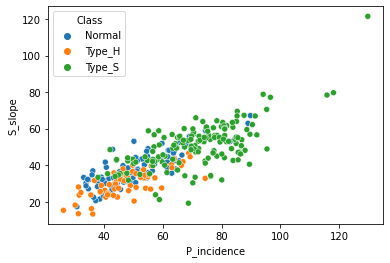

In [20]:
sns.scatterplot(x=df.P_incidence, y = df.S_slope , hue = df.Class)

<AxesSubplot:xlabel='P_incidence', ylabel='P_radius'>

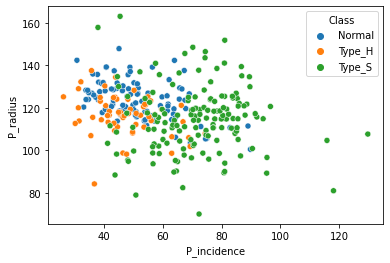

In [21]:
sns.scatterplot(x=df.P_incidence, y = df.P_radius , hue = df.Class)

<AxesSubplot:xlabel='P_incidence', ylabel='S_Degree'>

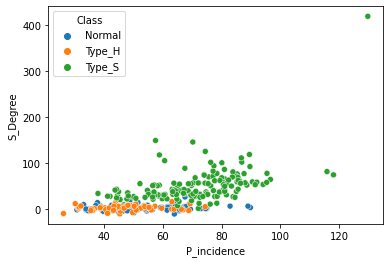

In [22]:
sns.scatterplot(x=df.P_incidence, y = df.S_Degree , hue = df.Class)

<AxesSubplot:xlabel='P_tilt', ylabel='L_angle'>

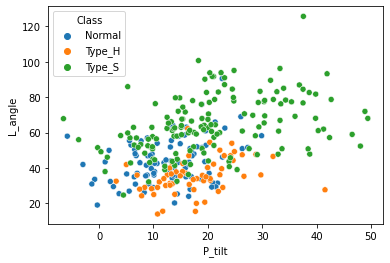

In [23]:
sns.scatterplot(x=df.P_tilt, y = df.L_angle , hue = df.Class)

<AxesSubplot:xlabel='P_tilt', ylabel='S_slope'>

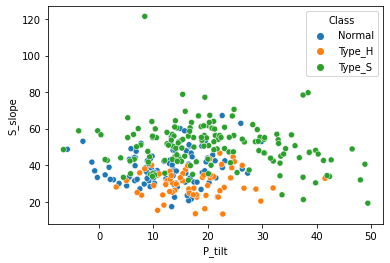

In [24]:
sns.scatterplot(x=df.P_tilt, y = df.S_slope , hue = df.Class)

<AxesSubplot:xlabel='P_tilt', ylabel='P_radius'>

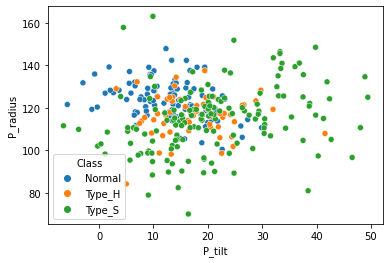

In [25]:
sns.scatterplot(x=df.P_tilt, y = df.P_radius , hue = df.Class)

<AxesSubplot:xlabel='P_tilt', ylabel='S_Degree'>

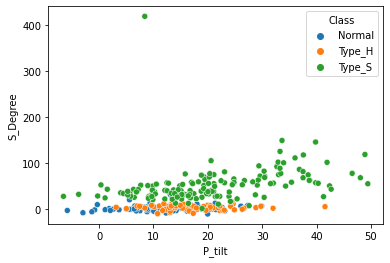

In [26]:
sns.scatterplot(x=df.P_tilt, y = df.S_Degree , hue = df.Class)

<AxesSubplot:xlabel='L_angle', ylabel='S_slope'>

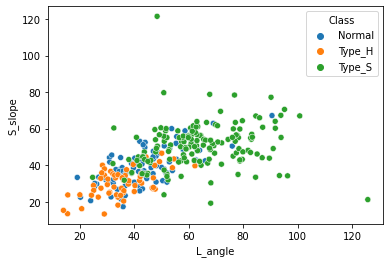

In [27]:
sns.scatterplot(x=df.L_angle, y = df.S_slope , hue = df.Class)

<AxesSubplot:xlabel='L_angle', ylabel='P_radius'>

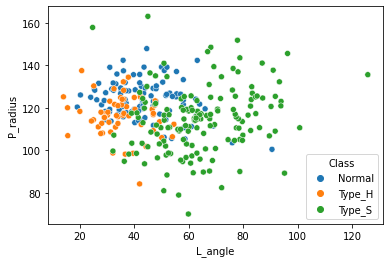

In [28]:
sns.scatterplot(x=df.L_angle, y = df.P_radius , hue = df.Class)

<AxesSubplot:xlabel='L_angle', ylabel='S_Degree'>

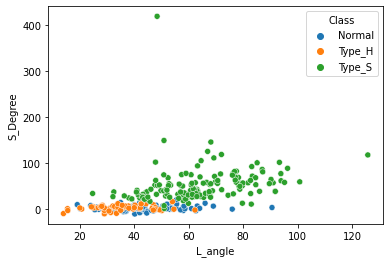

In [29]:
sns.scatterplot(x=df.L_angle, y = df.S_Degree , hue = df.Class)

<AxesSubplot:xlabel='S_slope', ylabel='S_Degree'>

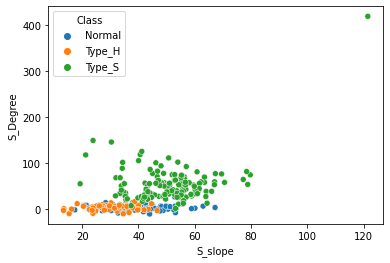

In [30]:
sns.scatterplot(x=df.S_slope, y = df.S_Degree , hue = df.Class)

<AxesSubplot:xlabel='S_slope', ylabel='P_radius'>

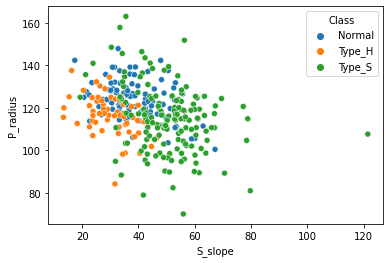

In [31]:
sns.scatterplot(x=df.S_slope, y = df.P_radius , hue = df.Class)

<AxesSubplot:xlabel='P_radius', ylabel='S_Degree'>

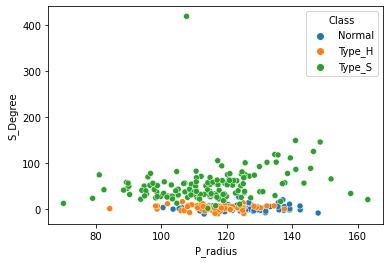

In [32]:
sns.scatterplot(x=df.P_radius, y = df.S_Degree , hue = df.Class)

multivariate analysis

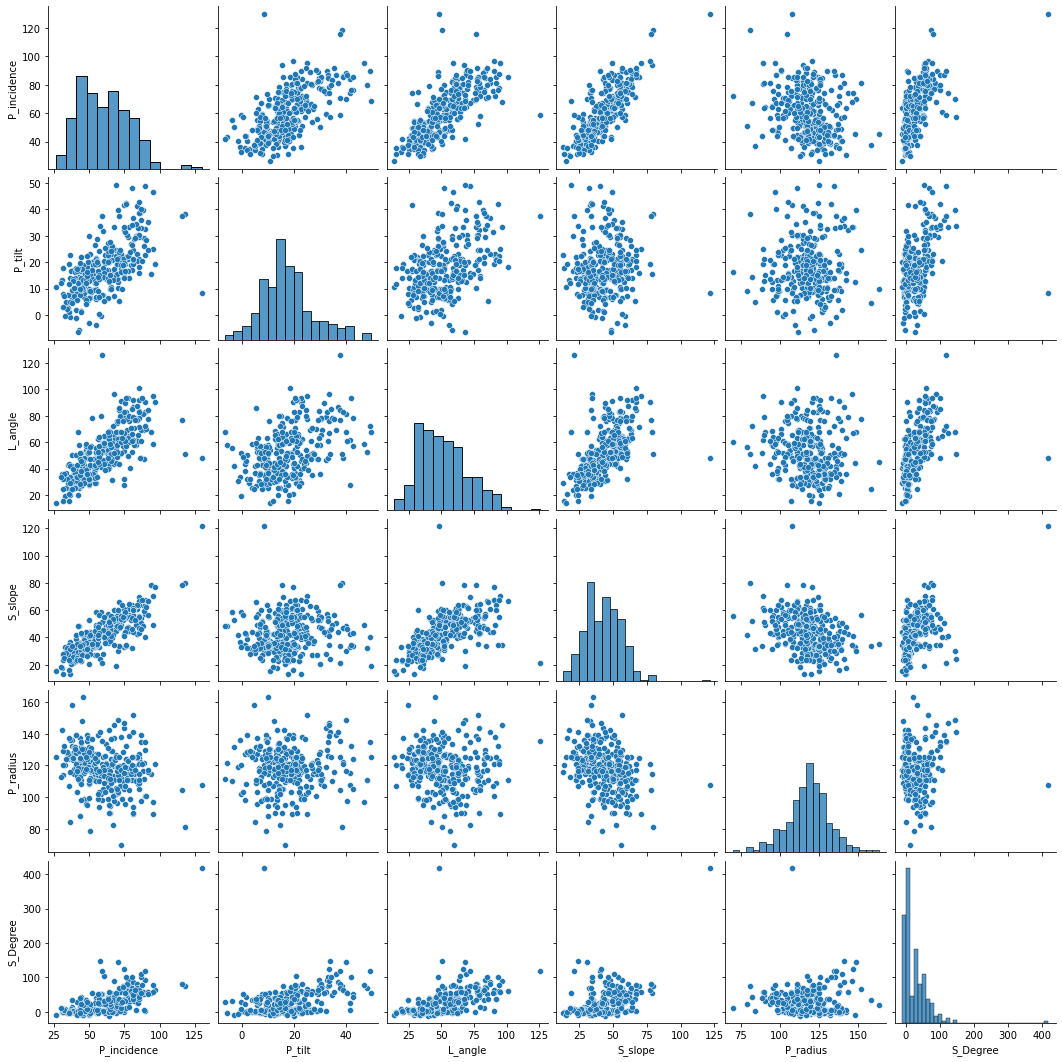

In [33]:
sns.pairplot(df)

<AxesSubplot:>

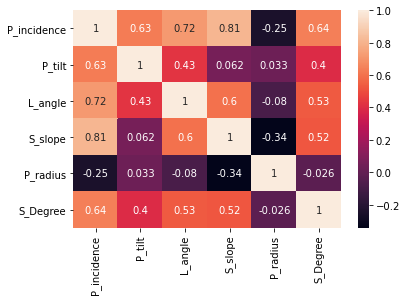

In [34]:
cor = df.corr()
sns.heatmap(cor,  annot=True)

### 4. Data pre-processing:

4. a. Segregate predictors vs target attributes

In [35]:
#Use label encoder to convert categorical variables to one-hot encoding (dummy variables)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Class"]=le.fit_transform(df.Class)

In [36]:
X=df.drop('Class',axis =1)
Y = df.Class

predictor and target attributes are segregated

4. b. Perform normalisation or scaling if required.

The ranges of the predictor attributes are not similar.
Hence we have to do normalisation of the data.

In [38]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X)
X_norm = norm.transform(X)

4. c. Check for target balancing. Add your comments.

<AxesSubplot:xlabel='Class', ylabel='count'>

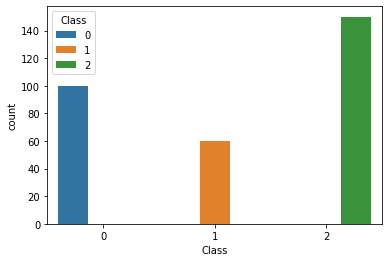

In [39]:
sns.countplot(x= df.Class, hue = df.Class)

Here in the df dataframe we have 60 samples with class as Type_H, 100 samples with class as Normal, 150 samples with class as type_S.

Since, the class type Type_S has almost thrice the amount of samples as that of Type_H, we need to perform target balancing.

In the dataset, number of samples is just 310. We cannot drop useful data samples. Thus, Random under-sampling is ruled out. 

Random over-sampling is also not a good option, as we risk overfitting the dataset.

*Synthetic Minority Oversampling Technique* is used since it prevents overrfitting and no useful information is lost.

In [40]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_res, Y_res = sm.fit_sample(X_norm, Y)

(450, 6)
(450,)


<AxesSubplot:xlabel='Class', ylabel='count'>

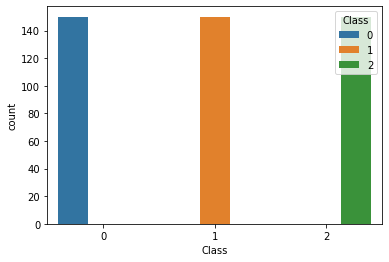

In [41]:
print(X_res.shape)
print(Y_res.shape)
sns.countplot(x= Y_res, hue = Y_res)

The number of samples from our dataset have incresed from 310 to 450 after target balancing.

4. d.  Perform train-test split.

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res , test_size=0.2, random_state=1)

In [43]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(360, 6)
(360,)
(90, 6)
(90,)


### 5. Model training, testing and tuning:

5. a. Design and train a KNN classifier.

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn= KNeighborsClassifier(n_neighbors = 25)

knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=25)

5. b. Display the classification accuracies for train and test data.

In [45]:
Y_pred= knn.predict(X_train)

print("train accuracy : " , accuracy_score(Y_train,Y_pred) )

Y_pred= knn.predict(X_test)

print("test accuracy : " , accuracy_score(Y_test,Y_pred) )

train accuracy :  0.7944444444444444
test accuracy :  0.8444444444444444


5. c.  Display and explain the classification report in detail.

1    33
2    29
0    28
dtype: int64
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        25
           1       0.85      0.97      0.90        29
           2       0.97      0.78      0.86        36

    accuracy                           0.84        90
   macro avg       0.84      0.85      0.84        90
weighted avg       0.86      0.84      0.85        90



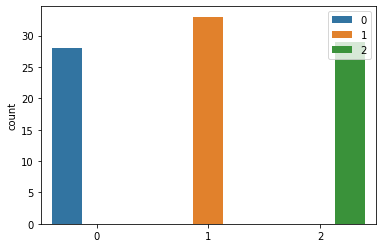

In [46]:
from sklearn.metrics import classification_report

sns.countplot(x= Y_pred, hue = Y_pred)
print(pd.Series(Y_pred).value_counts())

print(classification_report(Y_test,Y_pred))

The classifier made a total of 90 predictions.

Out of the 90 predictions, 28 are classified as normal, 33 are classified as Type_H and 28 are classified as Type_S.

In reality, the test dataset contains 25,29 and 36 samples of Normal, Type_H and Type_S respectively.  

5. d. Automate the task of finding best values of K for KNN.

5. e. Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model. 

In [47]:
from sklearn.model_selection import cross_val_score

neighbours=[]
cv_scores=[]

for k in range(1,100,2):
    neighbours.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,Y, cv=10, scoring = 'accuracy')
    cv_scores.append(scores.mean())
    
scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
print(scores)

[0.74193548 0.58064516 0.80645161 0.74193548 0.77419355 0.77419355
 0.74193548 0.77419355 0.74193548 0.77419355]


The optimal number of neighbors is 25


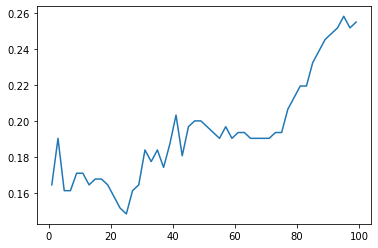

In [48]:
MSE = [1 - x for x in  cv_scores]

# determining best k using cross validation
optimal_k = neighbours[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)
plt.plot(neighbours, MSE)

The best score is obtained when the number of neighbours is 25.
Hence, we have selected the number of neighbours as 25.

# 6. Conclusion and improvisation:

6. a. Write your conclusion on the results.

After the implementation and the execution of the created machine learning model using the “K-Nearest Neighbor Classifier algorithm” it could be clearly revealed that the predicted model for the given dataset gives the best accuracy score as 84.44%.

When applying the KNN classifier it offered various scores for the accuracy when the number of neighbors varied. The model gave this decent accuracy score when the optimal numbers of neighbors were 25, where the model was tested with the values in the range from 1 to 100 as the value of “K” or the number of neighbors.

To select the best tuning parameter in this model applied 10 fold cross-validation for testing. From that experimental result, it observed that to classify whether the patient's class is normal, type_H or type_S accurately.

Furthermore, in the data exploration section with descriptive statistics of the data set and visualization tasks revealed a better idea of the data set before the prediction.

Moreover, the classification report in the evaluation section clearly represented the accuracy scores and visualizations in detail for the predicted model.

6. b. Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the research team to perform a better data analysis in future.

In future the data should include:

• more biomechanics features

• more samples in the dataset

• collect data samples such that target attribute has approximately equal number of unique samples.

• any other parameter of the patient like age or medical history

# DOMAIN: Banking and finance

# CONTEXT: 
A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign. 

# DATA DESCRIPTION: 
The data consists of the following attributes: 
1. ID: Customer ID
2. Age Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card.

# PROJECT OBJECTIVE: 
Build an AIML model to perform focused marketing by predicting the potential customers who will convert using the historical dataset.
 Steps and tasks:
## 1. Import and warehouse data:

• Import all the given datasets and explore shape and size of each.

• Merge all datasets onto one and explore final shape and size.

## 2. Data cleansing:

• Explore and if required correct the datatypes of each attribute

• Explore for null values in the attributes and if required drop or impute values.

## 3. Data analysis & visualisation:

• Perform detailed statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. 

## 4. Data pre-processing:

• Segregate predictors vs target attributes

• Check for target balancing and fix it if found imbalanced.

• Perform train-test split.

## 5. Model training, testing and tuning:

• Design and train a Logistic regression and Naive Bayes classifiers.

• Display the classification accuracies for train and test data.

• Display and explain the classification report in detail.

• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model. 

## 6. Conclusion and improvisation:

• Write your conclusion on the results.

• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the bank to perform a better data analysis in future.

# Solution : 

Importing libraries

In [49]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Import and warehouse data:

1. a.  Import all the given datasets and explore shape and size of each.

In [50]:
ds1=pd.read_csv("Part2 - Data1.csv")
ds2=pd.read_csv("Part2 -Data2.csv")

In [51]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [52]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


1. b. Merge all datasets onto one and explore final shape and size.

In [53]:
ds = pd.merge(ds1,ds2,on='ID')
ds

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


# 2. Data cleansing:

2. a. Explore and if required correct the datatypes of each attribute

In [54]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [55]:
ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


2. b. Explore for null values in the attributes and if required drop or impute values.

In [56]:
ds.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [57]:
ds.LoanOnCard= ds.LoanOnCard.apply(lambda x : 1 if x == 1 else 0 )

Here we have removed all the null values from the dataset.
Only the column LoanOnCard has 20 null values.
Here we can assume that if the LoanOnCard column is vacant, then it means there is no loan on the card. i.e. LoanOnCard = 0 

# 3. Data analysis & visualisation:

3. a. Perform detailed statistical analysis on the data

In [58]:
ds.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


<AxesSubplot:xlabel='Age', ylabel='Count'>

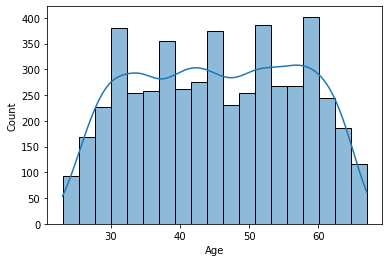

In [59]:
sns.histplot(ds.Age, kde=True )

<AxesSubplot:xlabel='CustomerSince', ylabel='Count'>

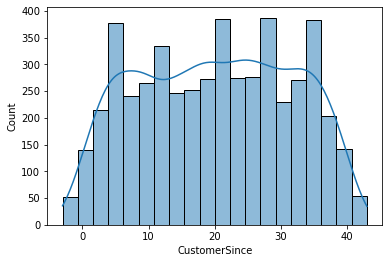

In [60]:
sns.histplot(ds.CustomerSince, kde= True)

<AxesSubplot:xlabel='HighestSpend', ylabel='Count'>

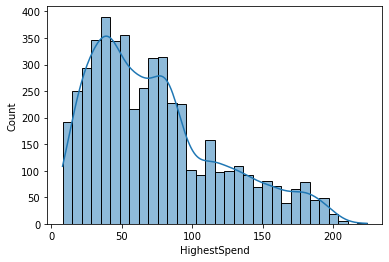

In [61]:
sns.histplot(ds.HighestSpend, kde= True)

C:\Users\ac253\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ZipCode'>

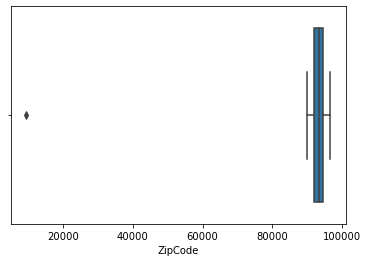

In [62]:
sns.boxplot(ds.ZipCode)

Here,  we understand that there is an outlier present in the data.
This is a clerical mistake.

AxesSubplot(0.125,0.125;0.775x0.755)


<ipython-input-63-9e79a1a83d7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.ZipCode[ds.ZipCode < 80000]=10*ds.ZipCode[ds.ZipCode < 80000]
C:\Users\ac253\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


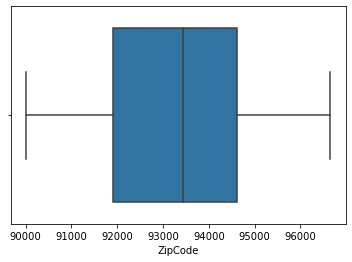

In [63]:
# After dealing with the outlier
ds.ZipCode[ds.ZipCode < 80000]=10*ds.ZipCode[ds.ZipCode < 80000]
print(sns.boxplot(ds.ZipCode))

<AxesSubplot:xlabel='ZipCode', ylabel='Count'>

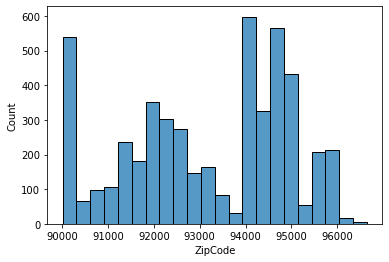

In [64]:
sns.histplot(ds.ZipCode)

C:\Users\ac253\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HiddenScore', ylabel='count'>

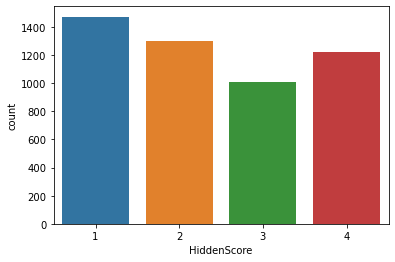

In [65]:
sns.countplot(ds.HiddenScore)

<AxesSubplot:xlabel='MonthlyAverageSpend', ylabel='Count'>

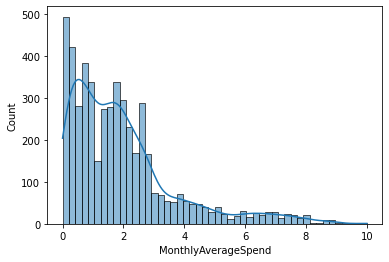

In [66]:
sns.histplot(ds.MonthlyAverageSpend, kde= True)

C:\Users\ac253\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Level', ylabel='count'>

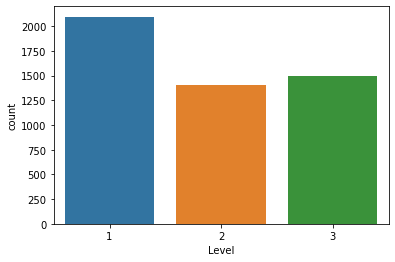

In [67]:
sns.countplot(ds.Level)

<AxesSubplot:xlabel='Mortgage', ylabel='Count'>

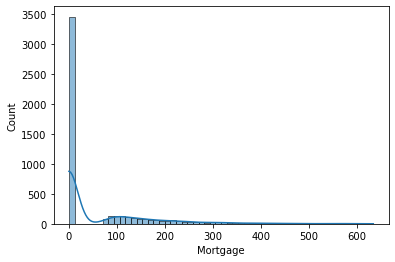

In [68]:
sns.histplot(ds.Mortgage,kde=True,stat='count')

<AxesSubplot:xlabel='Mortgage', ylabel='Count'>

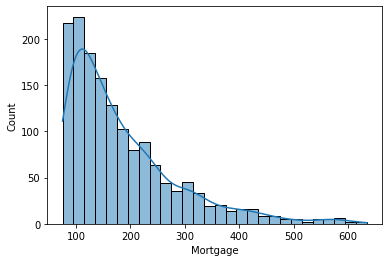

In [69]:
mort=ds.Mortgage[ds.Mortgage > 0]
# Here we are looking for the count of people who have mortgage. 
# Hence we have excluded people with zero mortgage from the chart.
sns.histplot(mort, kde= True)

<AxesSubplot:xlabel='Security', ylabel='count'>

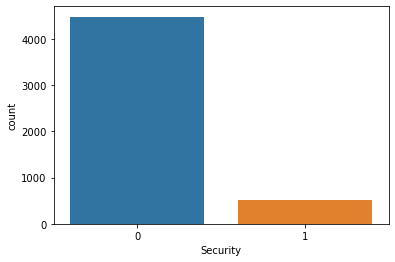

In [70]:
sns.countplot(x=ds.Security)

C:\Users\ac253\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FixedDepositAccount', ylabel='count'>

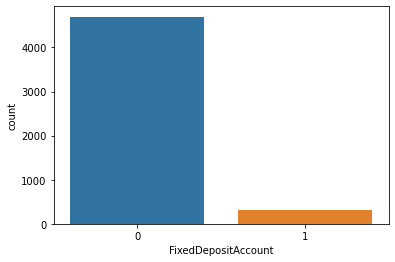

In [71]:
sns.countplot(ds.FixedDepositAccount)

C:\Users\ac253\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='InternetBanking', ylabel='count'>

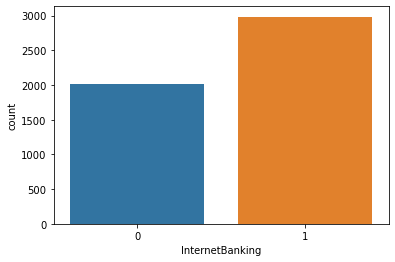

In [72]:
sns.countplot(ds.InternetBanking)

C:\Users\ac253\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditCard', ylabel='count'>

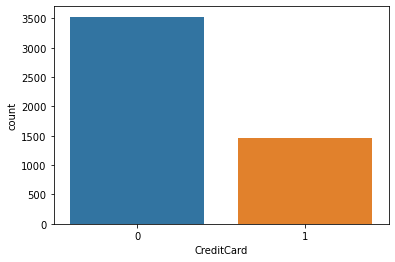

In [73]:
sns.countplot(ds.CreditCard)

C:\Users\ac253\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

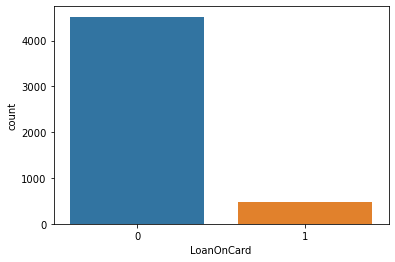

In [74]:
sns.countplot(ds.LoanOnCard)

Since zipcode and ID column have no effect on the customer's ability to get a loan, we will drop the columns.

In [75]:
ds=ds.drop(['ID','ZipCode'], axis=1)
ds

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0,0
4996,30,4,15,4,0.4,1,85,0,0,1,0,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0,0


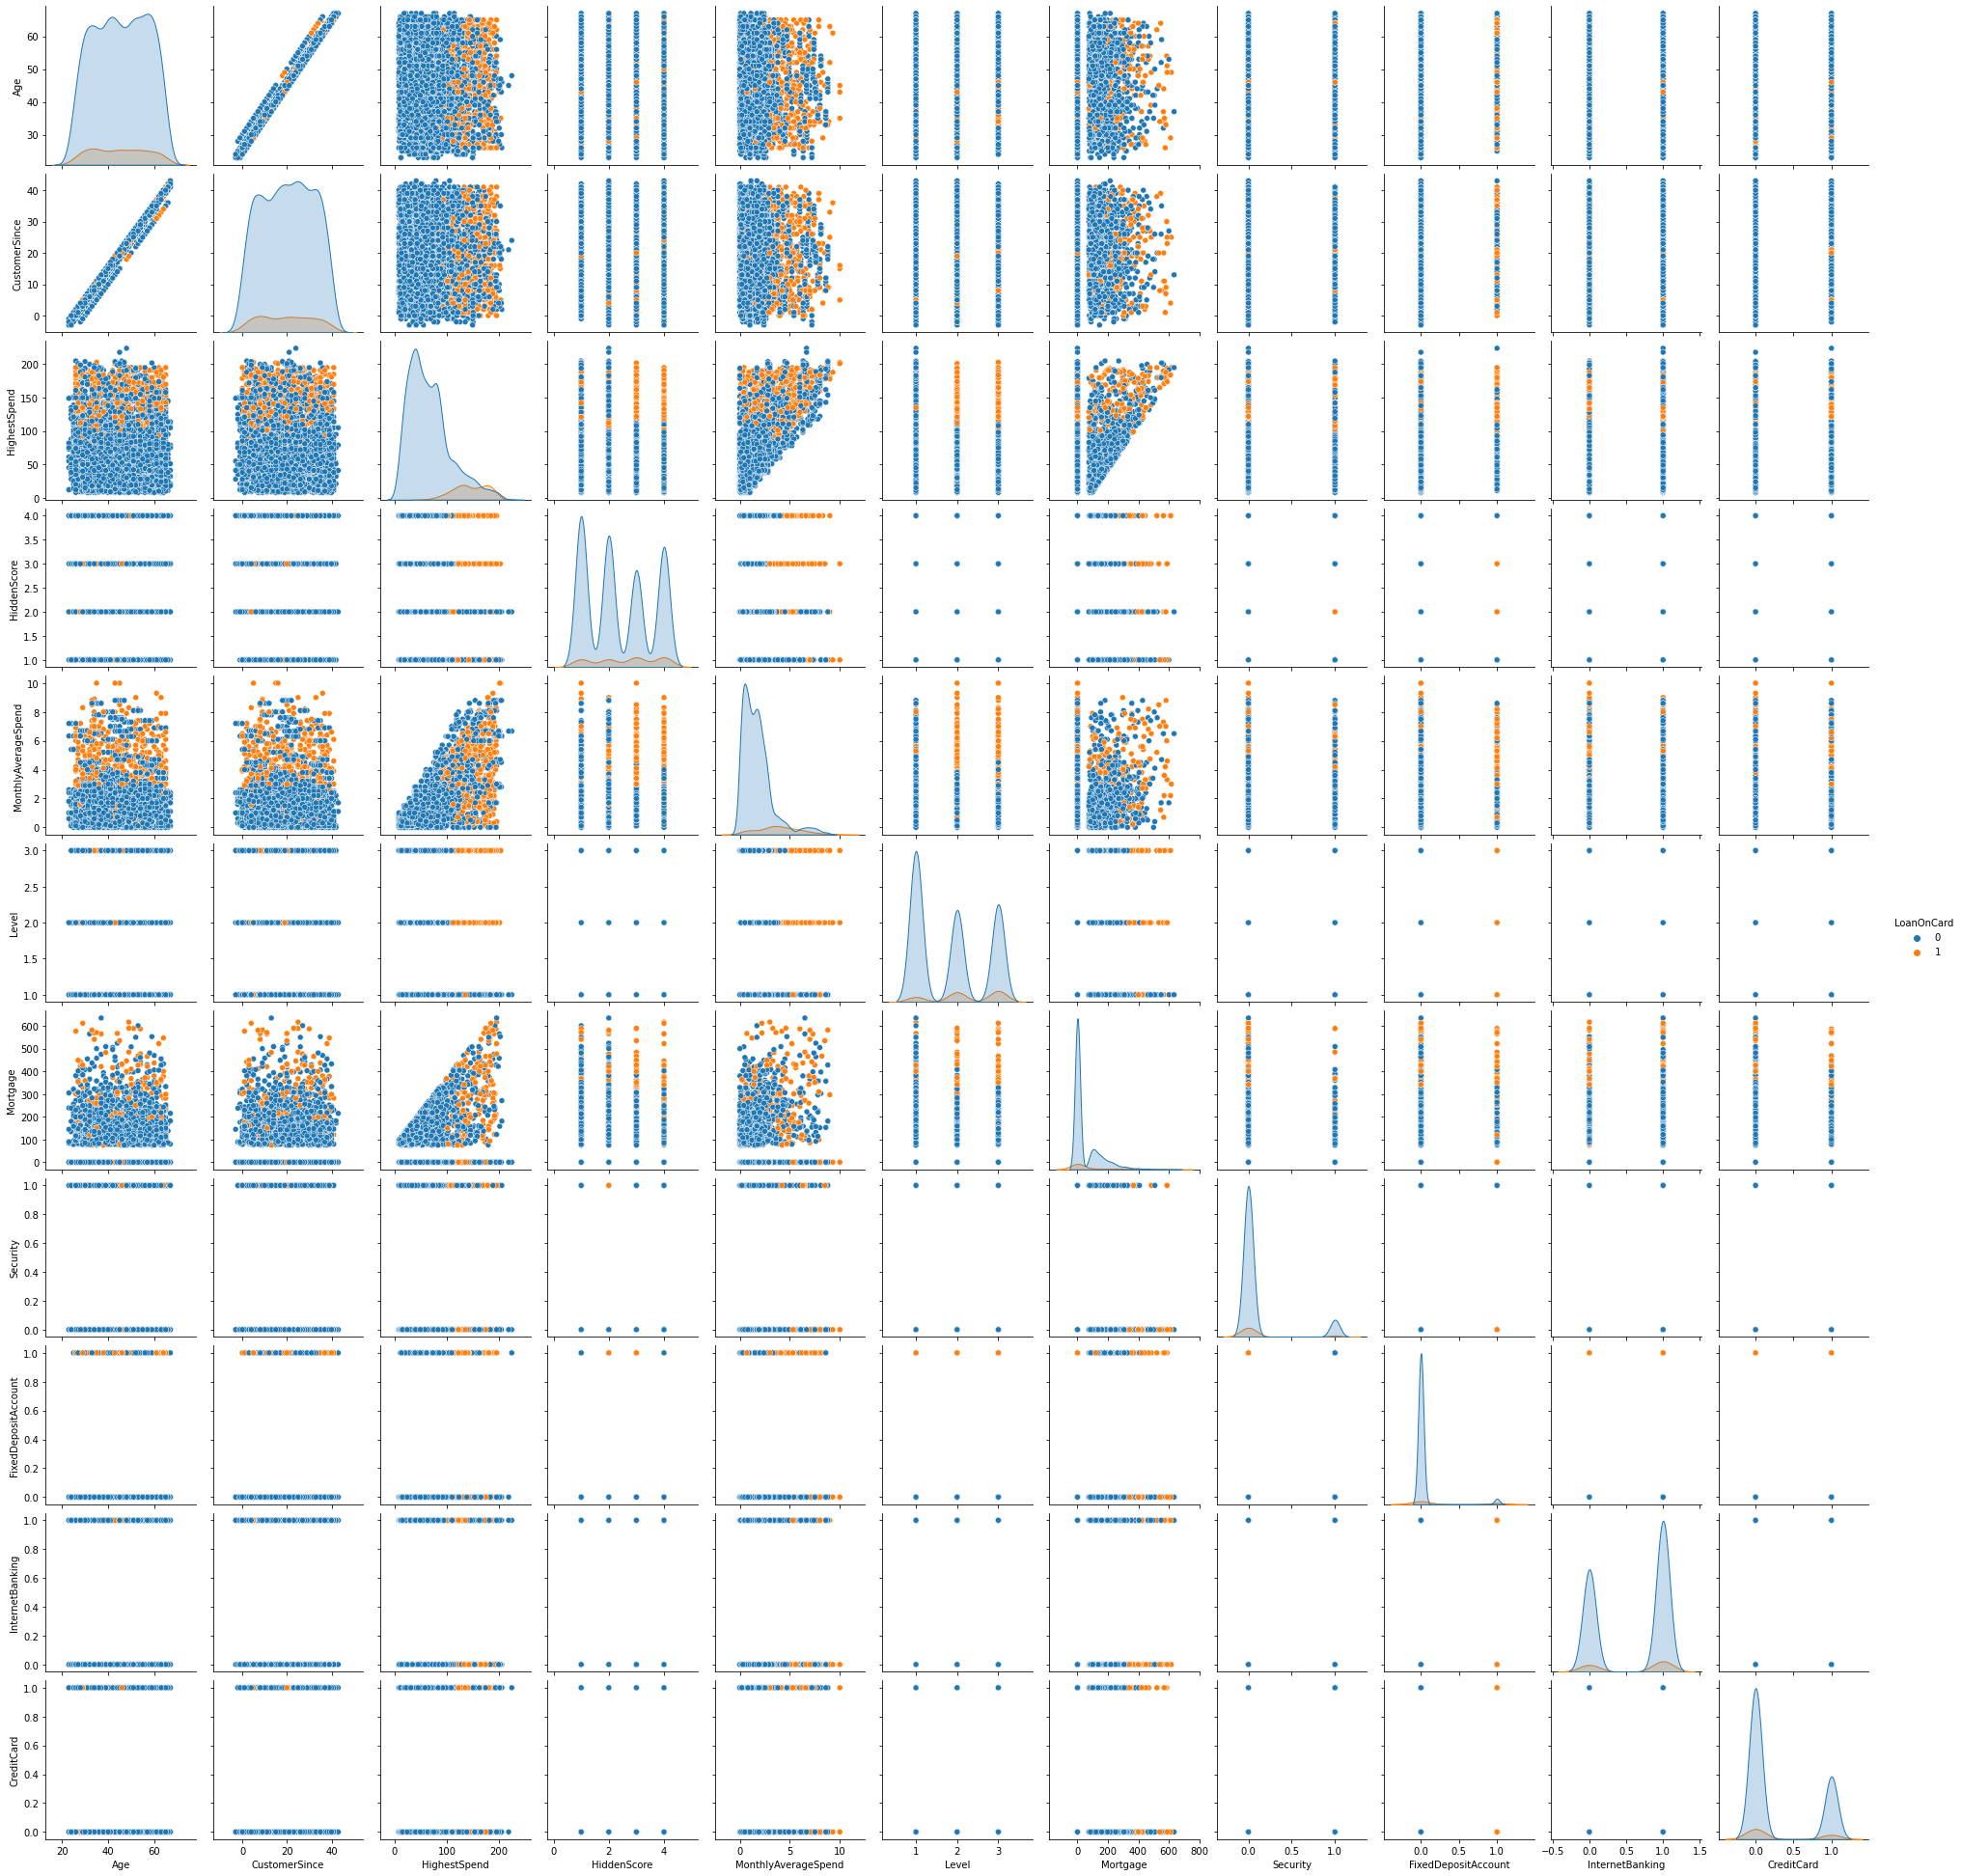

In [76]:
sns.pairplot(ds, hue = 'LoanOnCard')

0.994214856968332


<AxesSubplot:xlabel='Age', ylabel='CustomerSince'>

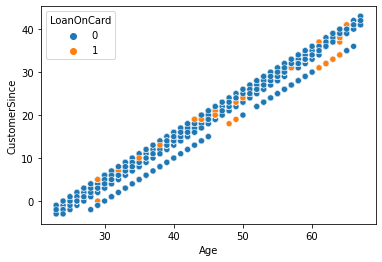

In [77]:
print(ds.Age.corr(ds.CustomerSince))
sns.scatterplot(x=ds.Age,y=ds.CustomerSince, hue = ds.LoanOnCard)


In Naive bayes, we assume that the atttributes are independent.
Here, the corelation between Age and CustomerSince column is almost 1.
Thus, they are not indepent of each other. Here we drop one of the columns.

In [78]:
ds=ds.drop(ds[['CustomerSince']], axis=1)
ds

,Age,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,49,4,1.6,1,0,1,0,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,1,0,0
4996,30,15,4,0.4,1,85,0,0,1,0,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,1,0,0


In [79]:
corela=ds.corr()
corela

,Age,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
Age,1.000000,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681,-0.007726
HighestSpend,-0.055269,1.000000,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385,0.502462
HiddenScore,-0.046418,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588,0.061367
MonthlyAverageSpend,-0.052012,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689,0.366889
Level,0.041334,-0.187524,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014,0.136722
Mortgage,-0.012539,0.206806,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231,0.142095
Security,-0.000436,-0.002616,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028,0.021954
FixedDepositAccount,0.008043,0.169738,0.014110,0.136534,0.013934,0.089311,0.317034,1.000000,0.175880,0.278644,0.316355
InternetBanking,0.013702,0.014206,0.010354,-0.003611,-0.015004,-0.005995,0.012627,0.175880,1.000000,0.004210,0.006278
CreditCard,0.007681,-0.002385,0.011588,-0.006689,-0.011014,-0.007231,-0.015028,0.278644,0.004210,1.000000,0.002802


<AxesSubplot:>

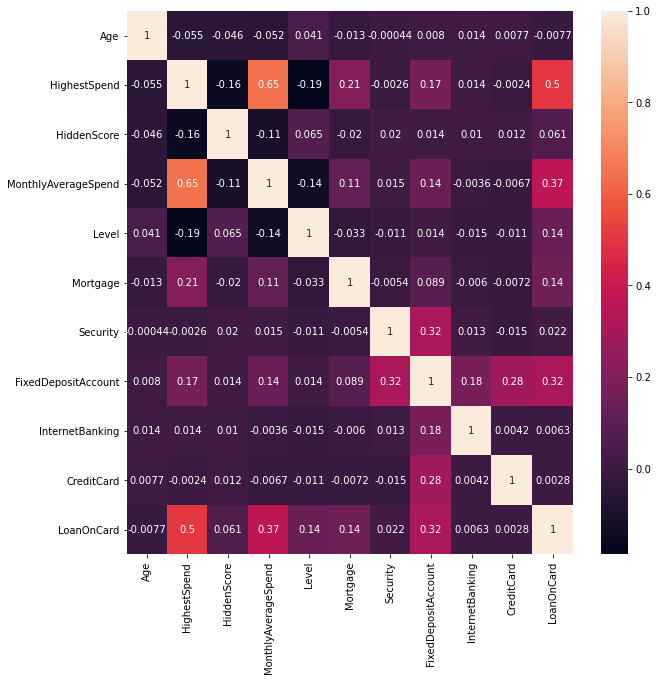

In [80]:
plt.subplots(figsize=(10,10))
sns.heatmap(corela, annot=True)

# 4. Data pre-processing:

4. a. Segregate predictors vs target attributes

In [81]:
X=ds.drop('LoanOnCard',axis =1)
Y = ds.LoanOnCard

In [82]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X)
X_norm = norm.transform(X)

Here, we are performing normalisation.

4. b. Check for target balancing and fix it if found imbalanced.

0    4520
1     480
Name: LoanOnCard, dtype: int64


C:\Users\ac253\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

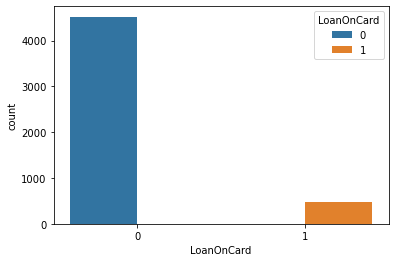

In [83]:
print(Y.value_counts())
sns.countplot(Y, hue = Y)

Here in the ds dataframe we have 4520 samples with no loan on card, 480 samples with loan on card.

Since this is a very huge difference in the sample size of the target attribute, we need to perform target balancing.

*Synthetic Minority Oversampling Technique* is used since it prevents overrfitting and no useful information is lost.

In [84]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_res, Y_res = sm.fit_sample(X_norm, Y)

(9040, 10)
(9040,)
0    4520
1    4520
Name: LoanOnCard, dtype: int64


<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

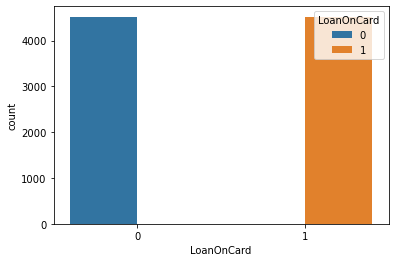

In [85]:
print(X_res.shape)
print(Y_res.shape)
print(Y_res.value_counts())
sns.countplot(x= Y_res, hue = Y_res)

The number of samples from our dataset have incresed from 5000 to 9040 after target balancing.

4. c.  Perform train-test split.

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res , test_size=0.2, random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(7232, 10)
(7232,)
(1808, 10)
(1808,)


5. Model training, testing and tuning:

5. a. Design and train a Logistic regression and Naive Bayes classifiers

In [87]:
#Build the logistic regression model
logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, Y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [88]:
#Build the Gaussian Naive Bayes model
nb_model = GaussianNB()

nb_model.fit(X_train, Y_train.ravel())

GaussianNB()

5. b. Display the classification accuracies for train and test data.

In [89]:
#Predict for train set using logistic regression
pred_train = logreg.predict(X_train)

from sklearn.metrics import accuracy_score
train_accuracy=accuracy_score(Y_train, pred_train)

print('Train Accuracy: ',np.round(train_accuracy,2))

Train Accuracy:  0.91


In [90]:
#Predict for test set using logistic Regression
pred_test = logreg.predict(X_test)

test_accuracy=accuracy_score(Y_test, pred_test)

print('Test Accuracy: ',np.round(test_accuracy,2))

Test Accuracy:  0.9


In [91]:
#Predict for train set using Naive Bayes
train_predict = nb_model.predict(X_train)

from sklearn import metrics

print("Model Accuracy for train set: {0:.4f}".format(metrics.accuracy_score(Y_train,train_predict)))

Model Accuracy for train set: 0.8414


In [92]:
#Predict for test set using Naive Bayes
test_predict = nb_model.predict(X_test)


print("Model Accuracy for test set: {0:.4f}".format(metrics.accuracy_score(Y_test,test_predict)))

Model Accuracy for test set: 0.8374


5. c. Display and explain the classification report in detail.

1    919
0    889
dtype: int64
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       879
           1       0.91      0.90      0.90       929

    accuracy                           0.90      1808
   macro avg       0.90      0.90      0.90      1808
weighted avg       0.90      0.90      0.90      1808



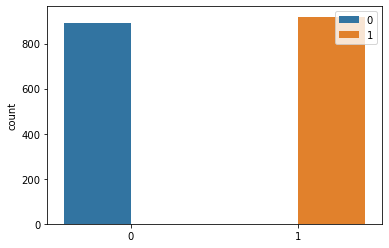

In [93]:
# for logistic Regression

from sklearn.metrics import classification_report

print(pd.Series(pred_test).value_counts())
sns.countplot(x= pred_test, hue = pred_test)

print(classification_report(Y_test,pred_test))

The logistic regression classifier made a total of 1808 predictions.

Out of the 1808 predictions, 889 are classified as '0' (i.e. No loan on card) and 919 are classified as '1'(i.e. There is loan on card).

In reality, of the 1808 samples, 879 are in class '0' (i.e. No loan on card) and 929 are in class '1'(i.e. There is loan on card).

0    991
1    817
dtype: int64
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       879
           1       0.89      0.78      0.83       929

    accuracy                           0.84      1808
   macro avg       0.84      0.84      0.84      1808
weighted avg       0.84      0.84      0.84      1808



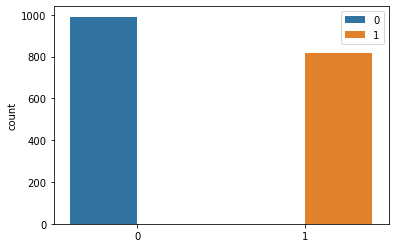

In [94]:
# for naive bayes

print(pd.Series(test_predict).value_counts())
sns.countplot(x= test_predict, hue = test_predict)

print(classification_report(Y_test,test_predict))

The naive bayes classifier made a total of 1808 predictions.

Out of the 1808 predictions, 991 are classified as '0' (i.e. No loan on card) and 817 are classified as '1'(i.e. There is loan on card).

In reality, of the 1808 samples, 879 are in class '0' (i.e. No loan on card) and 929 are in class '1'(i.e. There is loan on card).

5. d. Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model. 

In [95]:
# for Logistic regression

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X, Y, cv=10, scoring='accuracy')
print(scores)

[0.956 0.948 0.95  0.942 0.956 0.954 0.958 0.936 0.966 0.942]


In [96]:
# for naive bayes

scores = cross_val_score(nb_model, X, Y, cv=10, scoring='accuracy')
print(scores)

[0.894 0.856 0.896 0.87  0.9   0.882 0.892 0.878 0.876 0.886]


We have already normalization and resampled the data.

# 6. Conclusion and improvisation:

We have implemented logistic regression and naive bayes classifier to predict if the bank's customer will take a loan or not. With logistic regression we have obtained the accuracy of 90% and for naive bayes classfier we have obtained the accuracy of 83.74%.

Due to solve the problem of imbalanced data of target attributes,  resampling is done to balance the target attribute. We have used SMOTE to resample the data.

Furthermore, in the data exploration section with descriptive statistics of the data set and visualization tasks revealed a better idea of the data set before the prediction.

Moreover, the classification report in the evaluation section clearly represented the accuracy scores and visualizations in detail for the predicted model.

In future the data should include:

• salary

• number of dependents

• any foreseeable expense like college tutions, child birth

• any other data that can have any impact on their decisions to get a loan ie inheritance, investments.